In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('uber.csv')

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)
df.dropna(inplace=True)

<Axes: ylabel='fare_amount'>

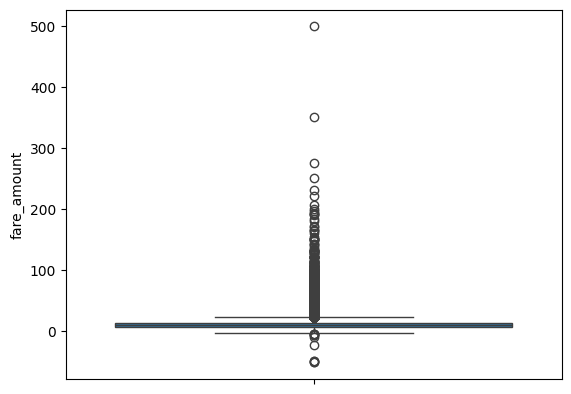

In [ ]:
sns.boxplot(df['fare_amount'])

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
for c in df.columns:
    Q1 = df[c].quantile(0.25)  # 25th percentile
    Q3 = df[c].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile Range

    # Define acceptable range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that have outliers in the column
    df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

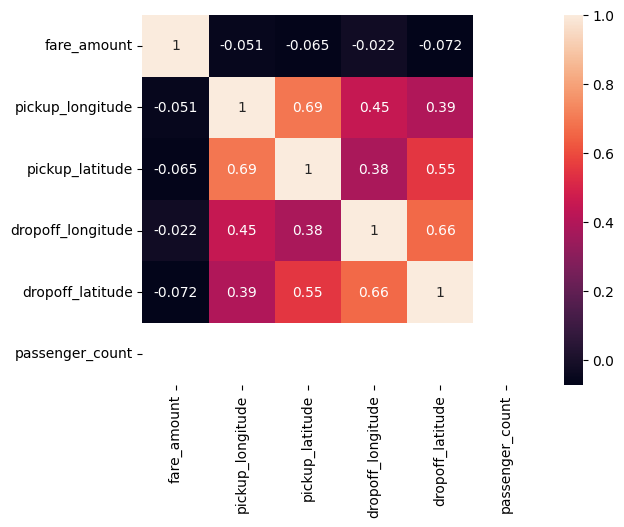

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
y_pred

array([8.15496132, 8.5054093 , 8.42585485, ..., 8.16117271, 8.397504  ,
       8.56389688])

In [ ]:
mse

11.007967621000827

In [ ]:
r2

0.007566231318713257

In [ ]:
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
y_pred

array([ 5.035,  5.316,  7.275, ...,  5.722, 13.082,  9.978])

In [ ]:
mse

3.489305807184692

In [ ]:
r2

0.685418323206245